In [1]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.datasets import load_boston
from random import seed
from random import randrange
from csv import reader
from math import sqrt
from sklearn import preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prettytable import PrettyTable
from sklearn.linear_model import SGDRegressor
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

## 1.1 Reading Data

In [2]:
boston = load_boston()

In [3]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [4]:
Data = pd.DataFrame(boston.data, columns = boston.feature_names)
Data['price']=boston.target
Data.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [5]:
Y=boston.target
X=boston.data

In [6]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3)

In [7]:
print("X Shape: ",X.shape)
print("Y Shape: ",Y.shape)
print("X_Train Shape: ",x_train.shape)
print("X_Test Shape: ",x_test.shape)
print("Y_Train Shape: ",y_train.shape)
print("Y_Test Shape: ",y_test.shape)

X Shape:  (506, 13)
Y Shape:  (506,)
X_Train Shape:  (354, 13)
X_Test Shape:  (152, 13)
Y_Train Shape:  (354,)
Y_Test Shape:  (152,)


In [8]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
stdsc = scaler.fit(x_train)
x_train = stdsc.transform(x_train)
x_test = stdsc.transform(x_test)

In [9]:
## Adding the PRIZE Column in the data
train_data=pd.DataFrame(x_train)
train_data['price']=y_train
train_data.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,price
0,1.999196,-0.469702,0.988978,-0.269680,0.869367,-2.899971,1.104633,-1.227248,1.629277,1.495102,0.804891,0.157767,1.490903,11.9
1,-0.408857,-0.469702,-0.215866,-0.269680,0.238003,-0.466249,-0.891871,-0.659796,-0.421237,-0.122118,0.326175,0.456927,0.131379,24.5
2,-0.439484,2.938436,-1.351944,-0.269680,-1.468387,-0.052462,-1.277955,2.502535,-0.990824,-1.004238,-0.152540,-0.163146,0.039350,20.1
3,-0.431118,0.382332,-0.606975,3.708099,-0.794363,-0.474416,-0.234486,0.064275,-0.762989,-1.110093,0.038946,0.394583,0.139746,20.7
4,-0.435041,-0.469702,-0.960835,-0.269680,-0.922342,0.491995,-0.422310,0.309530,-0.762989,-0.968953,-0.008925,0.405348,-0.853055,26.6


In [10]:
x_test=np.array(x_test)
y_test=np.array(y_test)

##  Applying Custom SGD Regressor to data

In [11]:
#https://medium.com/@nikhilparmar9/simple-sgd-implementation-in-python-for-linear-regression-on-boston-housing-data-f63fcaaecfb1
def CustomSGD(train_data,learning_rate=0.001,n_itr=1000,k=10):
    w1=np.zeros(shape=(1,train_data.shape[1]-1))
    b1=0
    curr_itr=1
    while(curr_itr<=n_itr):
        w0=w1
        b0=b1
        # We keep our initial gradients as 0
        w_grad=np.zeros(shape=(1,train_data.shape[1]-1))
        b_grad=0
        # We will create a small training data set of size K
        temp=train_data.sample(k)
        # We create our X and Y from the above temp dataset
        y=np.array(temp['price'])
        x=np.array(temp.drop('price',axis=1))
        
        for i in range(k):# Calculating gradients for point in our K sized dataset
            prediction=np.dot(w0,x[i])+b_old
            w_grad += x[i]*(y[i]-(prediction))*(-2)
            b_grad += (y[i]-(prediction))*(-2)
            
        #Updating the weights(W) and Bias(b) with the above calculated Gradients
        w1=w0-learning_rate*(w_grad/k)
        b1=b0-learning_rate*(b_grad/k)
        
        if(w0==w1).all():
            break            
        # Incrementing the iteration value
        curr_itr+=1
        
    return w1,b1#Returning the weights and Bias


In [12]:
def predict(x,w,b):
    y_pred=[]
    for i in range(len(x)):
        y=np.asscalar(np.dot(w,x[i])+b)
        y_pred.append(y)
    return np.array(y_pred)

In [13]:
w,b = CustomSGD(train_data)

In [14]:
y_pred = predict(x_test,w,b)

In [15]:
#Make the preditions
plt_data = {'True Labels': y_test, 'Predicted Labels': y_pred}
plt_d = pd.DataFrame(data = plt_data)

In [16]:
Mean_Sq_Error = mean_squared_error(y_test, y_pred)
print(Mean_Sq_Error)

27.50107351792247


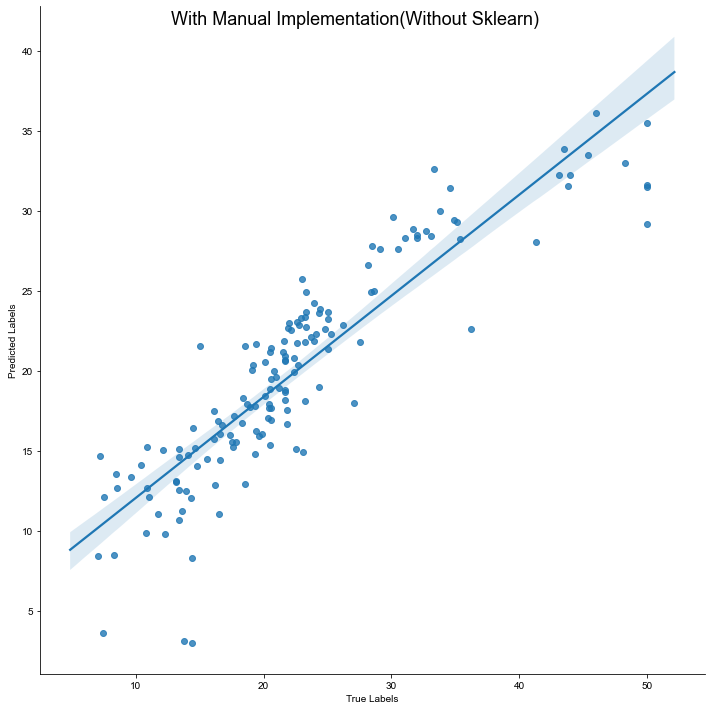

In [17]:
import seaborn as sns
lm1 = sns.lmplot(x="True Labels", y="Predicted Labels", data = plt_d, height = 10)
fig1 = lm1.fig
fig1.suptitle("With Manual Implementation(Without Sklearn)", fontsize=18)
sns.set(font_scale = 1.5)

## Applying Sklearn SGD Regressor to data

In [18]:
clf = SGDRegressor()
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print(mean_squared_error(y_test, y_pred))

22.343415330876258


In [19]:
#Make the preditions
plt_data = {'True Labels': y_test, 'Predicted Labels': y_pred}
plt_d = pd.DataFrame(data = plt_data)

In [20]:
Mean_Sq_Error = mean_squared_error(y_test, y_pred)
print(Mean_Sq_Error)

22.343415330876258


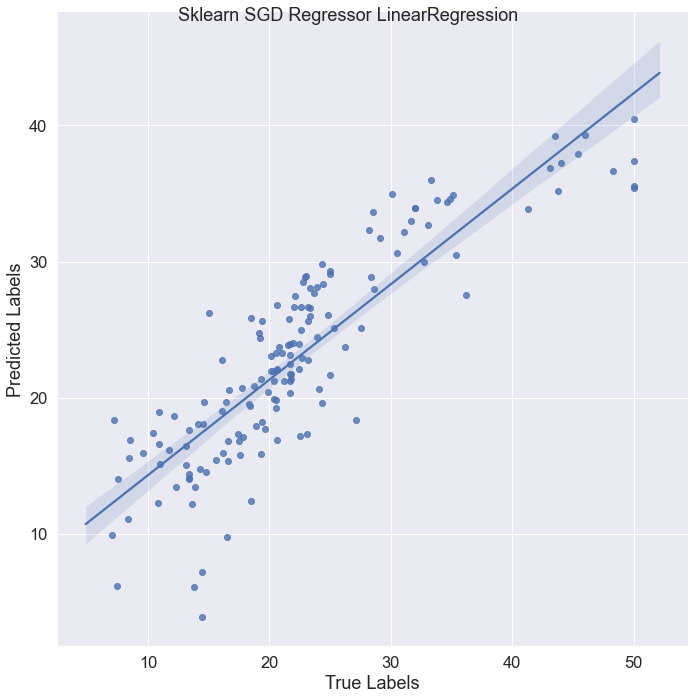

In [21]:
import seaborn as sns
lm1 = sns.lmplot(x="True Labels", y="Predicted Labels", data = plt_d, height = 10)
fig1 = lm1.fig
fig1.suptitle("Sklearn SGD Regressor LinearRegression", fontsize=18)
sns.set(font_scale = 1.5)

## Applying Sklearn Linear Regressor to data

In [22]:
clf1 = LinearRegression()
clf1.fit(x_train, y_train)
y_pred = clf1.predict(x_test)
print(mean_squared_error(y_test, y_pred))

22.520267958622785


In [23]:
#Make the preditions
plt_data = {'True Labels': y_test, 'Predicted Labels': y_pred}
plt_d = pd.DataFrame(data = plt_data)

In [24]:
Mean_Sq_Error = mean_squared_error(y_test, y_pred)
print(Mean_Sq_Error)

22.520267958622785


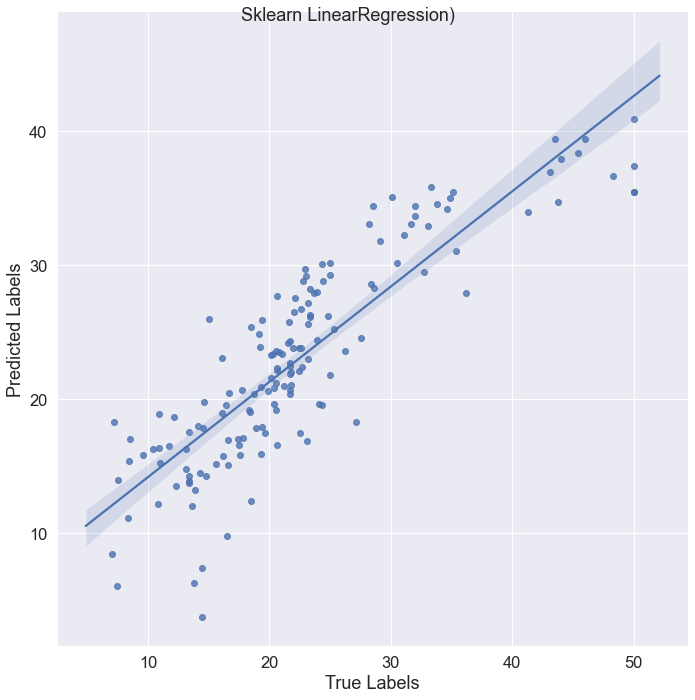

In [25]:
import seaborn as sns
lm1 = sns.lmplot(x="True Labels", y="Predicted Labels", data = plt_d, height = 10)
fig1 = lm1.fig
fig1.suptitle("Sklearn LinearRegression)", fontsize=18)
sns.set(font_scale = 1.5)

In [26]:
# Please compare all your models using Prettytable library
#http://zetcode.com/python/prettytable/
from prettytable import PrettyTable
    
x = PrettyTable()
x.field_names = ["Model", "Mean_Square_Error"]
x.add_row(["Manual SGD", 27.50])
x.add_row(["Sklearn SGD", 22.34])
x.add_row(["Sklearn LR", 22.52])

print(x)

+-------------+-------------------+
|    Model    | Mean_Square_Error |
+-------------+-------------------+
|  Manual SGD |        27.5       |
| Sklearn SGD |       22.34       |
|  Sklearn LR |       22.52       |
+-------------+-------------------+
